In [23]:
import scipy
import matplotlib.pyplot as plt
import polars as pl


In [35]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "Travel": ts[1, :],
            "Travel_rate": ts[2, :],
            "Pitch": ts[3, :],
            "Pitch_rate": ts[4, :],
            "Elevation": ts[5, :],
            "Elevation_rate": ts[6, :],
            "Disturbance": ts[7, :],
        }
    )

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


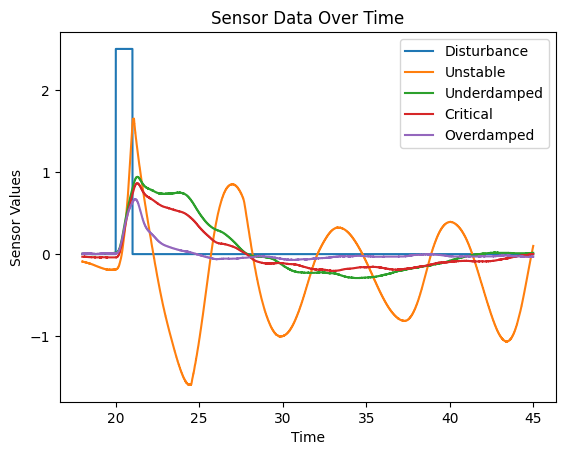

In [40]:
start_time = 18
end_time = 45

data_unstable = load_from_mat("data/1/data_unstable.mat", start_time, end_time)
data_underdamped = load_from_mat("data/1/data_underdamped.mat", start_time, end_time)
data_critical = load_from_mat("data/1/data_critical.mat", start_time, end_time)
data_overdamped = load_from_mat("data/1/data_overdamped.mat", start_time, end_time)

plt.figure()
plt.plot(data_critical["time"], data_critical["Disturbance"] / 2, label="Disturbance")

plt.plot(data_unstable["time"], data_unstable["Pitch"], label="Unstable")
plt.plot(data_underdamped["time"], data_underdamped["Pitch"], label="Underdamped")
plt.plot(data_critical["time"], data_critical["Pitch"], label="Critical")
plt.plot(data_overdamped["time"], data_overdamped["Pitch"], label="Overdamped")

plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Sensor Data Over Time")
plt.legend()
plt.show()